In [47]:
# Practical No : 4
# Title: Feature Scaling
# Name : Snehal Gawade
#PRN : 2401208025

In [48]:
import pandas as pd

In [49]:
import sklearn.preprocessing as preproc

In [50]:
df=pd.read_csv(r"C:\Users\user\Desktop\MSC(Data Science)\Statistic\statistic(Python)\OnlineNewsPopularity.csv")

In [51]:
df.shape

(39644, 61)

In [52]:
# First 5 rows
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [53]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [54]:
# Total number of words in an article
df['n_tokens_content'].sum()

21666030

In [55]:
df['n_tokens_content']

0         219
1         255
2         211
3         531
4        1072
         ... 
39639     346
39640     328
39641     442
39642     682
39643     157
Name: n_tokens_content, Length: 39644, dtype: int64

In [56]:
# Min-Max scaling
df['minmax']=preproc.minmax_scale(df['n_tokens_content'])
df['minmax'].head()

0    0.025844
1    0.030092
2    0.024900
3    0.062662
4    0.126505
Name: minmax, dtype: float64

In [57]:
df['minmax'].max()

0.9999999999999999

In [58]:
df['minmax'].min()

0.0

In [59]:
# Standarization
df["standardized"]=preproc.StandardScaler().fit_transform(df[['n_tokens_content']])

In [60]:
df['standardized']

0       -0.695210
1       -0.618794
2       -0.712192
3       -0.032933
4        1.115439
           ...   
39639   -0.425630
39640   -0.463838
39641   -0.221852
39642    0.287592
39643   -0.826817
Name: standardized, Length: 39644, dtype: float64

In [61]:
# Normalization
df['normalized']=preproc.normalize(df[['n_tokens_content']])

In [62]:
df['normalized']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
39639    1.0
39640    1.0
39641    1.0
39642    1.0
39643    1.0
Name: normalized, Length: 39644, dtype: float64

In [63]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of article ')

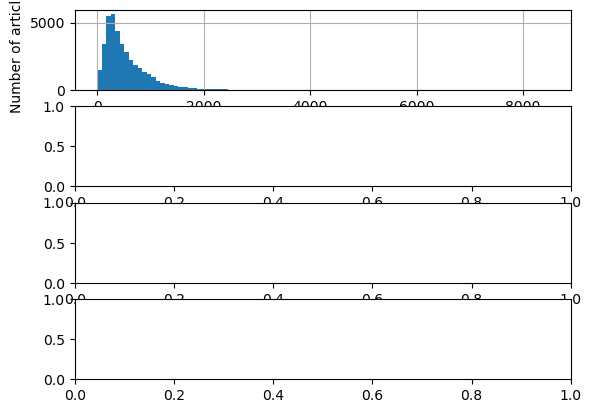

In [64]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1)
df['n_tokens_content'].hist(ax=ax1,bins=100)
ax1.set_xlabel("Article word count")
ax1.set_ylabel('Number of article ')

Text(0, 0.5, 'Number of article ')

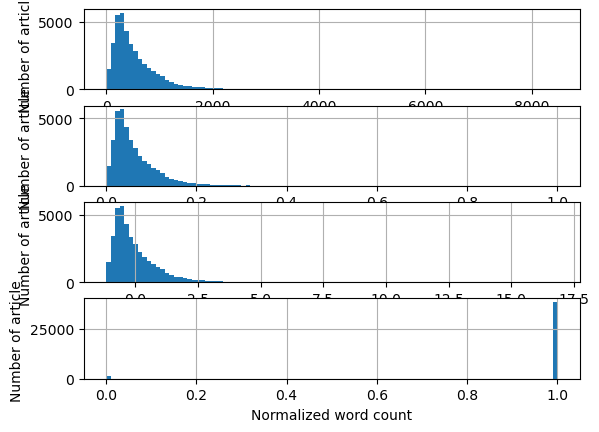

In [65]:
# Plotting the histograms of original and scaled data
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1)
df['n_tokens_content'].hist(ax=ax1,bins=100)
df['minmax'].hist(ax=ax2,bins=100)
df['standardized'].hist(ax=ax3,bins=100)
df['normalized'].hist(ax=ax4,bins=100)
ax1.set_xlabel("Article word count")
ax1.set_ylabel('Number of article ')
ax2.set_xlabel("Min-Max scalw word count")
ax2.set_ylabel('Number of article ')
ax3.set_xlabel("Standarized word count")
ax3.set_ylabel('Number of article ')
ax4.set_xlabel("Normalized word count")
ax4.set_ylabel('Number of article ')

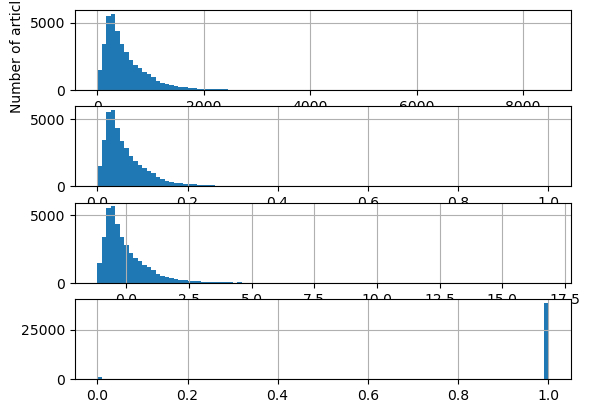

In [66]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1)
df['n_tokens_content'].hist(ax=ax1,bins=100)
df['minmax'].hist(ax=ax2,bins=100)
df['standardized'].hist(ax=ax3,bins=100)
df['normalized'].hist(ax=ax4,bins=100)
ax1.set_xlabel("Article word count")
ax1.set_ylabel('Number of article ')
ax1.tick_params()